#**FLOOD PREDICTION**

flood_image.avif

**Submitted by** : Vishnu E J
**Project Evaluation Date**: 25-10-2024

### TABLE OF CONTENTS

#### 1. Problem Statement
#### 2. Objective
#### 3. Data Collection
#### 4. Data Description
#### 5. EDA
#### 6. Data Preprocessing
#### 7. Visualization
#### 8. Data Splitting
#### 9. Model Selection
#### 10. Model Training and Evaluation (Without feature selection and hyperparameter tuning)
#### 11. Feature Selection
#### 12. Hyperparameter tuning
#### 13. Saving the model
#### 14. Load the model

#### PROBLEM STATEMENT

Flood detection refers to identifying, monitoring, and alerting authorities or individuals about the presence of flooding in a particular area. It involves using various technologies and methods to detect, predict, and the impacts of floods. Flood prediction is a critical area of research due to its significant impact on human life, infrastructure, and the environment. Accurate flood prediction models can aid in disaster preparedness and risk management, reducing the adverse effects of floods.

#### OBJECTIVE

Develop a machine learning model to predict the occurrence of floods based on environmental and weather features such as temperature, rainfall, humidity, and other climatic data.
*   Predict whether a flood will occur (binary classification: 1 for flood, 0 for no flood).
*   Identify the most important climatic features that influence flood events.




#### DATA COLLECTION

The data contains monthly records of weather and environmental observations from multiple stations, along with a target column (Flood?) indicating flood occurrence.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dm=pd.read_csv('FloodPrediction.csv')
dm.head()

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Flood?
0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,NaN
1,Barisal,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.7,90.36,4,NaN
2,Barisal,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.7,90.36,4,NaN
3,Barisal,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.7,90.36,4,NaN
4,Barisal,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.7,90.36,4,NaN


### DATA DESCRIPTION

This dataset contains Rainfall, Relative_Humidity, Wind_Speed, Cloud_Coverage, and other relevant attributes. It's a great dataset for learning to work with data analysis and visualization.

**Dataset**:  https://docs.google.com/spreadsheets/d/1AyALjj0qjONSfRlqGJnh5_pAcP6tQ_iEVyi3w49jIHs/edit?gid=1464562813#gid=1464562813
*   Number of rows: 20,544
*   Number of columns: 17
*   Target column: Flood? (Binary target: 1 = Flood, 0 = No Flood)
*   Null Values: The Flood? column has many missing values (16,051 out of 20,544).

**Key columns**:

*   **Station_Names**: The name of the weather station where data was recorded.
***Year, Month**: Temporal data to indicate when the measurements were taken.
*   **Max_Temp**: Maximum temperature recorded (in Celsius).
*   **Min_Temp**: Minimum temperature recorded (in Celsius).
*   **Rainfall**: Rainfall amount (in mm).
*   **Relative_Humidity**: Humidity percentage.
*   **Wind_Speed**: Wind speed (units might need clarification).
*   **Cloud_Coverage**: Cloud cover fraction or percentage.
*   **Bright_Sunshine**: Duration of bright sunshine (likely in hours).
*   **Station_Number**: A unique identifier for the station.
*   **X_COR, Y_COR**: Coordinates in a projected coordinate system.
*   **LATITUDE, LONGITUDE**: Geographic coordinates.
*   **ALT**: Altitude (in meters).





### EXPLORATORY DATA ANALYSIS



*   Explore the distribution of key features.
*   Handle missing values and outliers.
*   Analyze correlations between features and the target (Flood?).




In [2]:
dm.columns

Index(['Station_Names', 'Year', 'Month', 'Max_Temp', 'Min_Temp', 'Rainfall',
       'Relative_Humidity', 'Wind_Speed', 'Cloud_Coverage', 'Bright_Sunshine',
       'Station_Number', 'X_COR', 'Y_COR', 'LATITUDE', 'LONGITUDE', 'ALT',
       'Flood?'],
      dtype='object')

In [3]:
dm.shape

(20544, 17)

In [4]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20544 entries, 0 to 20543
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Station_Names      20544 non-null  object 
 1   Year               20544 non-null  int64  
 2   Month              20544 non-null  int64  
 3   Max_Temp           20544 non-null  float64
 4   Min_Temp           20544 non-null  float64
 5   Rainfall           20544 non-null  float64
 6   Relative_Humidity  20544 non-null  float64
 7   Wind_Speed         20544 non-null  float64
 8   Cloud_Coverage     20544 non-null  float64
 9   Bright_Sunshine    20544 non-null  float64
 10  Station_Number     20544 non-null  int64  
 11  X_COR              20544 non-null  float64
 12  Y_COR              20544 non-null  float64
 13  LATITUDE           20544 non-null  float64
 14  LONGITUDE          20544 non-null  float64
 15  ALT                20544 non-null  int64  
 16  Flood?             449

In [5]:
dm.describe()#provides a summary of statistics for numerical columns

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Flood?
count,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,4493.000000
mean,1985.332944,6.500000,33.450739,21.166872,198.776621,79.497375,1.415049,3.485827,6.419056,41935.098131,549703.189176,579280.955958,23.326647,90.493193,13.357477,0.919653
std,17.610799,3.452137,2.956401,4.949587,240.693197,7.667925,1.042454,2.083791,1.747959,36.516932,116032.076255,130616.053201,1.155241,1.108720,13.529530,0.271860
min,1948.000000,1.000000,21.600000,6.200000,0.000000,34.000000,0.000000,0.000000,0.000000,41859.000000,0.000000,0.000000,20.870000,88.560000,0.000000,0.000000
25%,1972.000000,3.750000,31.700000,16.900000,8.000000,75.000000,0.700000,1.600000,4.965517,41909.000000,435303.700000,504500.300000,22.640000,89.550000,4.000000,1.000000
50%,1987.000000,6.500000,33.900000,23.400000,111.000000,81.000000,1.200000,3.300000,6.800000,41941.000000,540098.600000,561770.300000,23.170000,90.410000,7.000000,1.000000
75%,2000.000000,9.250000,35.400000,25.400000,312.000000,85.000000,1.900000,5.500000,7.800000,41963.000000,650012.100000,687095.900000,24.290000,91.460000,19.000000,1.000000
max,2013.000000,12.000000,44.000000,28.100000,2072.000000,97.000000,11.200000,7.900000,11.000000,41998.000000,734765.400000,844822.300000,25.720000,92.260000,63.000000,1.000000


In [6]:
dm.dtypes

,0
Station_Names,object
Year,int64
Month,int64
Max_Temp,float64
Min_Temp,float64
Rainfall,float64
Relative_Humidity,float64
Wind_Speed,float64
Cloud_Coverage,float64
Bright_Sunshine,float64


In [7]:
dm.isnull().sum()

,0
Station_Names,0
Year,0
Month,0
Max_Temp,0
Min_Temp,0
Rainfall,0
Relative_Humidity,0
Wind_Speed,0
Cloud_Coverage,0
Bright_Sunshine,0


In [8]:
dm.nunique()

,0
Station_Names,33
Year,66
Month,12
Max_Temp,247
Min_Temp,265
Rainfall,1241
Relative_Humidity,217
Wind_Speed,284
Cloud_Coverage,115
Bright_Sunshine,429


In [9]:
dm.duplicated().sum()

0

In [10]:
num_cols=dm.select_dtypes(include='number').columns
num_cols

Index(['Year', 'Month', 'Max_Temp', 'Min_Temp', 'Rainfall',
       'Relative_Humidity', 'Wind_Speed', 'Cloud_Coverage', 'Bright_Sunshine',
       'Station_Number', 'X_COR', 'Y_COR', 'LATITUDE', 'LONGITUDE', 'ALT',
       'Flood?'],
      dtype='object')

In [11]:
cat_cols=dm.select_dtypes(include='object').columns
cat_cols

Index(['Station_Names'], dtype='object')

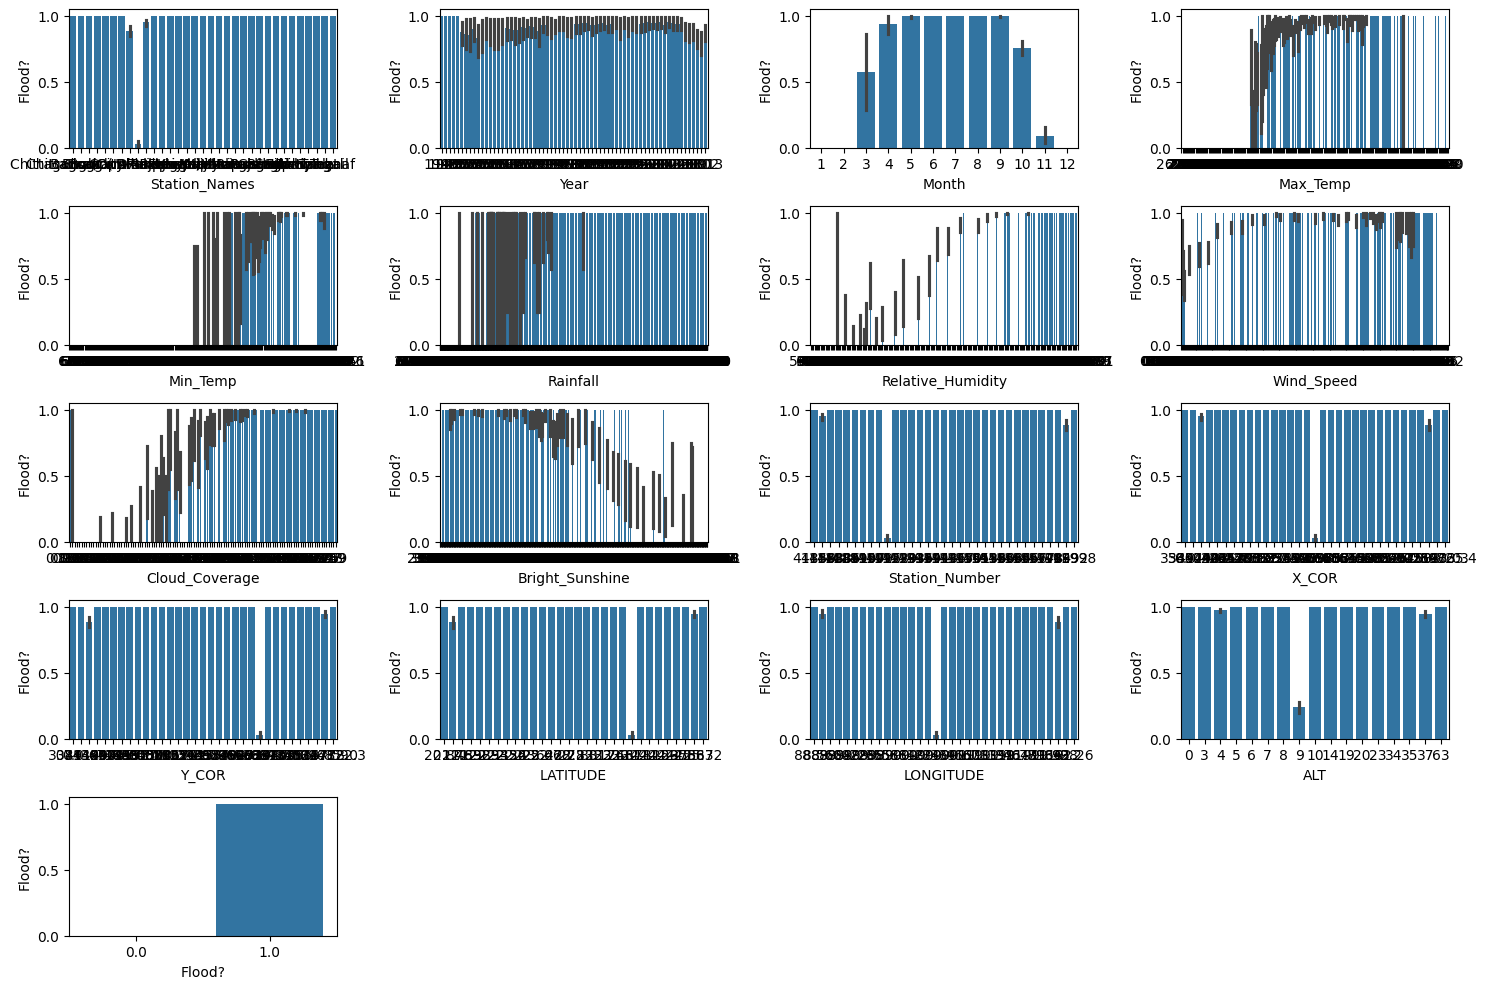

In [12]:
# bar plot to identify the relationship between flood and remaining features
plt.figure(figsize=(15, 10))
for i, col in enumerate(dm.columns):
    plt.subplot(5, 4, i+1)
    sns.barplot(data=dm,x=col,y='Flood?')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

*Explanation* - The bar plots reveal the relationships between flood events (Flood?) and key weather-related features:

*   Flood vs Rainfall:

As expected, higher rainfall shows some association with flood events, but not all high-rainfall events result in floods.
*   Flood vs Max Temperature:

There is no clear trend between maximum temperature and flood events.
*   Flood vs Min Temperature:

Similar to max temperature, the minimum temperature doesn't show a strong relationship with floods.
*   Flood vs Relative Humidity:

Some correlation might exist where higher humidity coincides with flood occurrences.
These bar plots suggest that rainfall and humidity might be more influential factors in flood occurrence, while temperatures appear less relevant.


#### Correlation Matrix

In [13]:
#understand the relationship betwwen the features
dmcorr=dm.drop(["Station_Names"],axis=1)
corr1=dmcorr.corr()
corr1

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Flood?
Year,1.000000e+00,-5.258512e-16,0.086210,0.050232,0.030456,0.091891,0.044258,0.006604,-0.083561,1.089689e-01,3.488473e-02,-1.190950e-01,-1.121100e-01,5.307237e-02,-7.611529e-02,-0.013793
Month,-5.258512e-16,1.000000e+00,-0.066337,0.233238,0.131826,0.419832,-0.155221,0.168033,-0.210787,1.544839e-15,-6.647636e-16,-4.195910e-16,-3.514922e-16,-5.632437e-16,-1.939173e-15,0.007507
Max_Temp,8.621033e-02,-6.633672e-02,1.000000,0.698916,0.256849,0.028744,0.308024,0.463165,-0.127072,-6.608043e-02,-1.275104e-01,5.528063e-02,5.789752e-02,-1.268460e-01,2.932317e-02,0.431290
Min_Temp,5.023233e-02,2.332379e-01,0.698916,1.000000,0.595176,0.538171,0.382957,0.828193,-0.514024,1.245563e-01,4.184944e-02,-1.270355e-01,-1.291222e-01,4.506379e-02,-8.973014e-02,0.816464
Rainfall,3.045589e-02,1.318256e-01,0.256849,0.595176,1.000000,0.592001,0.319578,0.765955,-0.676019,1.147305e-01,1.897868e-01,-1.055198e-01,-1.060542e-01,1.972219e-01,-1.499920e-02,0.518204
Relative_Humidity,9.189131e-02,4.198320e-01,0.028744,0.538171,0.592001,1.000000,0.095788,0.659697,-0.666537,1.324441e-01,1.356221e-01,-1.216152e-01,-1.257725e-01,1.379015e-01,-8.435432e-02,0.739078
Wind_Speed,4.425801e-02,-1.552212e-01,0.308024,0.382957,0.319578,0.095788,1.000000,0.388748,-0.174459,2.288811e-01,9.384981e-02,-2.248008e-01,-2.147945e-01,1.213800e-01,-1.449668e-01,0.226450
Cloud_Coverage,6.604325e-03,1.680327e-01,0.463165,0.828193,0.765955,0.659697,0.388748,1.000000,-0.743366,2.875881e-02,6.032982e-02,-2.563907e-02,-2.563207e-02,6.318079e-02,2.804592e-03,0.738527
Bright_Sunshine,-8.356127e-02,-2.107869e-01,-0.127072,-0.514024,-0.676019,-0.666537,-0.174459,-0.743366,1.000000,2.972534e-02,1.394002e-02,-3.101386e-02,-3.201442e-02,1.408221e-02,5.249082e-03,-0.551832
Station_Number,1.089689e-01,1.544839e-15,-0.066080,0.124556,0.114730,0.132444,0.228881,0.028759,0.029725,1.000000e+00,5.569808e-01,-9.743001e-01,-9.868368e-01,5.887549e-01,-5.205512e-01,0.090608


#### Heat map

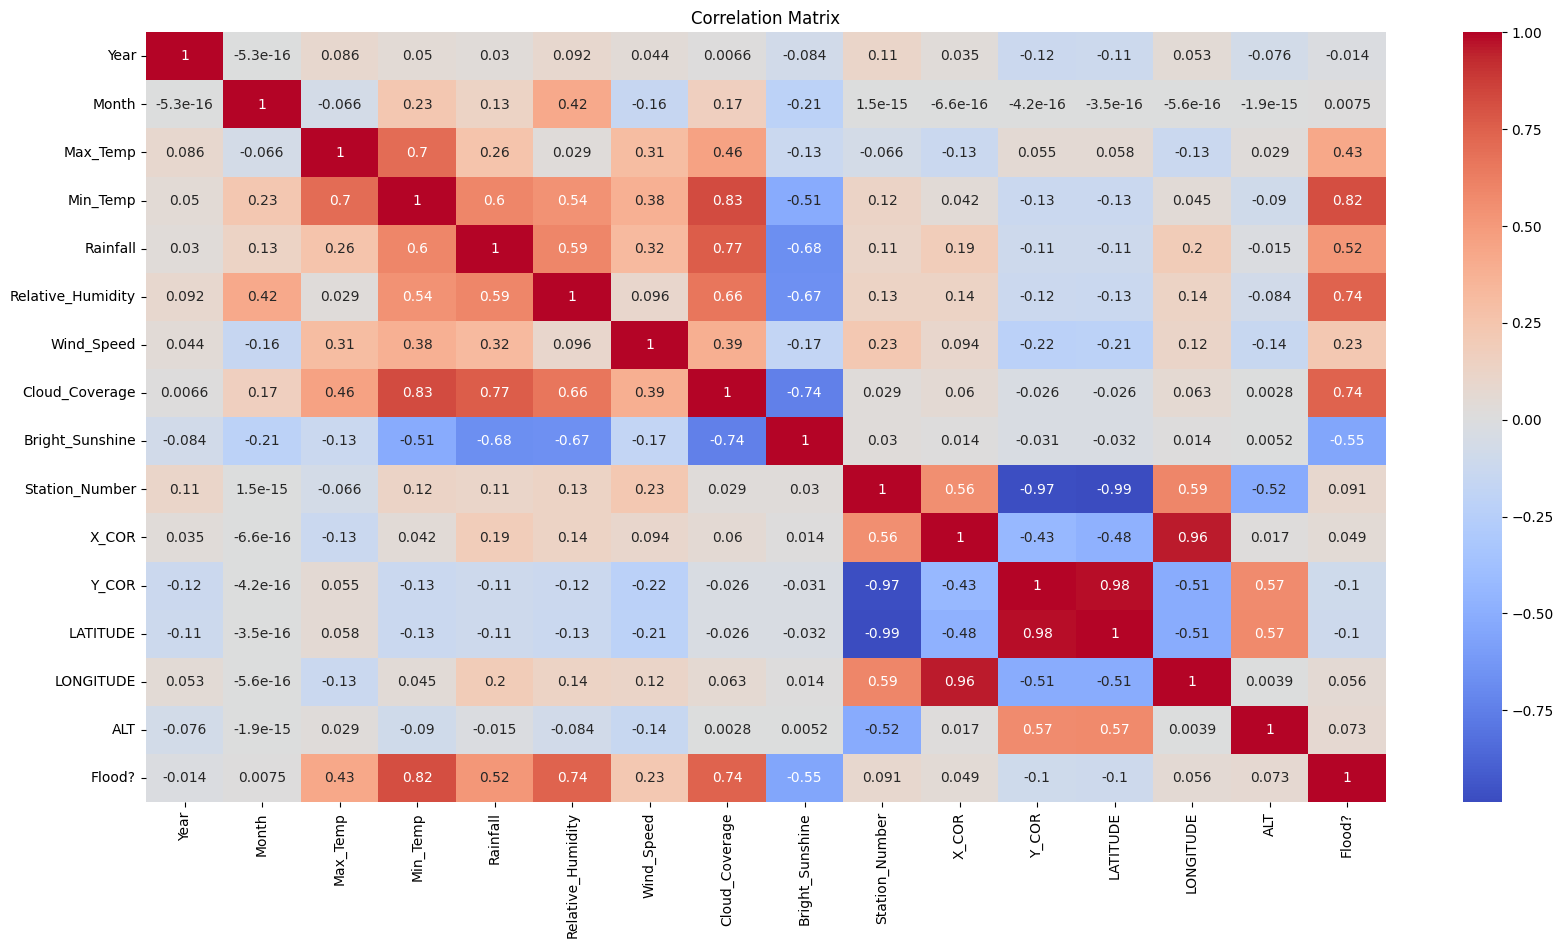

In [14]:
#visualize the corelation in datasets
plt.figure(figsize=(20, 10))
sns.heatmap(corr1,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

*Explanation* - This helps visualize relationships between different
features and spot strong correlations easily. The feature Min_Temp, Relative_Humidity, Cloud_Coverage, Rainfall is least correlated with the target variable 'Flood?'.

##### Features with multicollinearity:

*   Flood? and Min_Temp
*   Flood? and Relative_Humidity
*   Flood? and Cloud_Coverage
*   Flood? and Rainfall



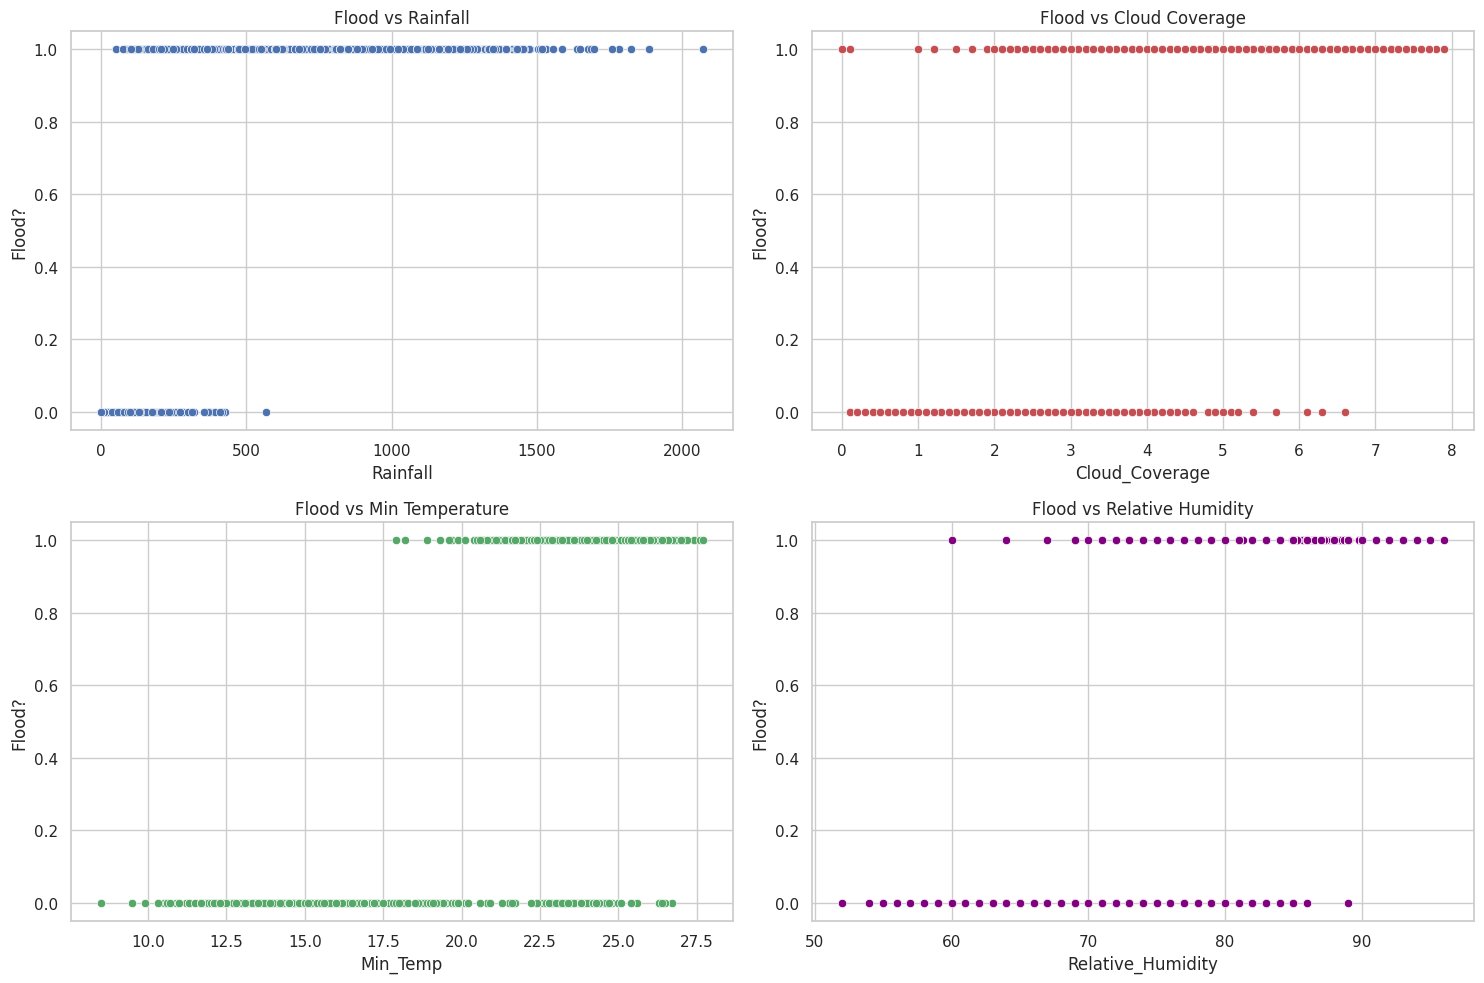

In [15]:

flood_data = dm
sns.set(style='whitegrid')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2x2 grid
# Scatter plot: Flood? vs Rainfall
sns.scatterplot(data=flood_data, x='Rainfall', y='Flood?', ax=axes[0, 0], color='b')
axes[0, 0].set_title('Flood vs Rainfall')

# Scatter plot: Flood? vs Cloud_Coverage
sns.scatterplot(data=flood_data, x='Cloud_Coverage', y='Flood?', ax=axes[0, 1], color='r')
axes[0, 1].set_title('Flood vs Cloud Coverage')

# Scatter plot: Flood? vs Min_Temp
sns.scatterplot(data=flood_data, x='Min_Temp', y='Flood?', ax=axes[1, 0], color='g')
axes[1, 0].set_title('Flood vs Min Temperature')

# Scatter plot: Flood? vs Relative_Humidity
sns.scatterplot(data=flood_data, x='Relative_Humidity', y='Flood?', ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Flood vs Relative Humidity')

plt.tight_layout()
plt.show()


*Explanation* - The scatter plots reveal the relationships between flood events (Flood?) and key weather-related features:

*   Flood vs Rainfall:

As expected, higher rainfall shows some association with flood events, but not all high-rainfall events result in floods.
*   Flood vs Cloud Coverage:

There is a relation between cloud coverage and flood events.
*   Flood vs Min Temperature:

Similar to cloud coverage, the minimum temperature show a relationship with floods.
*   Flood vs Relative Humidity:

Some correlation might exist where higher humidity coincides with flood occurrences, but it isn’t definitive.



#### DATA PREPROCESSING



*   Replace missing values in the Flood? column with 0.
*   Normalize/scale numerical features (like temperature, rainfall, etc.).
*   Remove the categorical column Station_Names. Encoded data Station_Number is used instead of that.




In [16]:
dm.drop(["Station_Names"],axis=1,inplace=True)  # drop unwanted column
dm.fillna(0, inplace=True) # Fill null values with 0. (binary classification: 1 for flood, 0 for no flood)

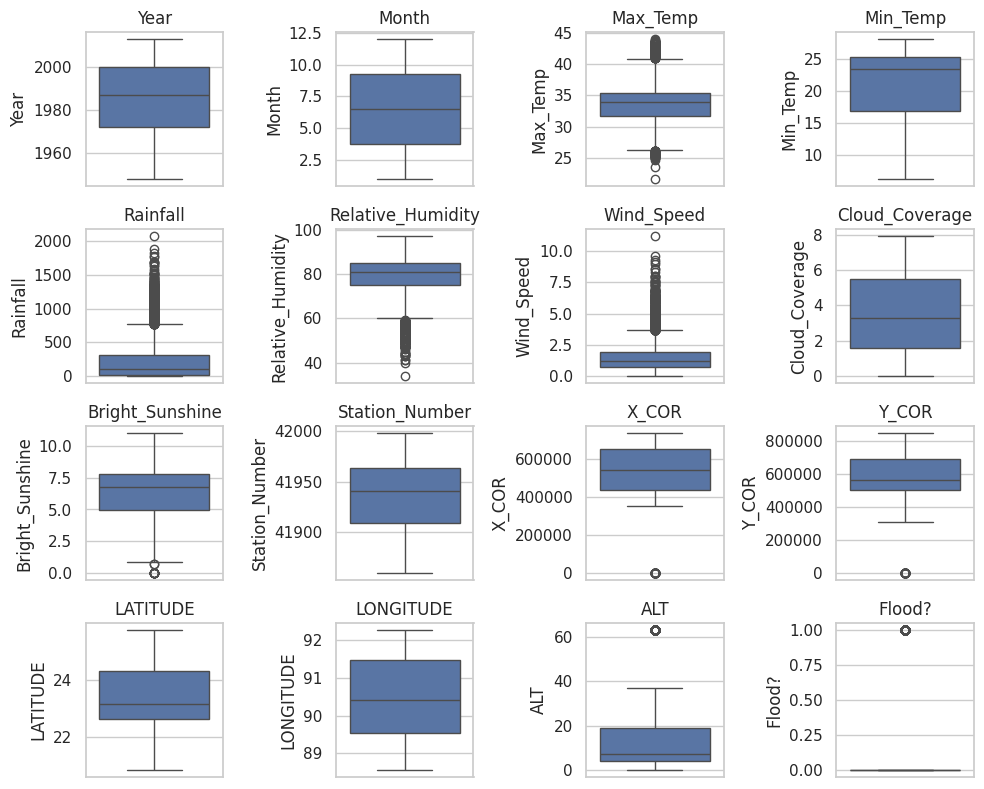

In [17]:
plt.figure(figsize=(10, 10))
num_cols = dm.select_dtypes(include = ["int64","float64"])
for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i+1)
    sns.boxplot(dm[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#### Removing outliers (Max_Temp)

In [18]:
q1_Max_Temp=dm.Max_Temp.quantile(0.25)
q3_Max_Temp=dm.Max_Temp.quantile(0.75)

# Step 2: Calculate the IQR (Interquartile Range)
iqr_Max_Temp=q3_Max_Temp-q1_Max_Temp

# Step 3: Define the lower and upper bounds for 'Max_Temp'
lower_bound_Max_Temp = q1_Max_Temp - 1.5 * iqr_Max_Temp
upper_bound_Max_Temp = q3_Max_Temp + 1.5 * iqr_Max_Temp

# Step 4: Filter out rows where 'Max_Temp' is outside the bounds
Max_Temp_outliers_removed = dm[(dm.Max_Temp >= lower_bound_Max_Temp) & (dm.Max_Temp <= upper_bound_Max_Temp)]

# Show the number of rows before and after removing outliers
print(f"Original dataset shape: {dm.shape}")
print(f"Dataset shape after removing outliers: {Max_Temp_outliers_removed.shape}")

# Display the first few rows of the data without outliers

dmp1 = Max_Temp_outliers_removed
dmp1.head()

Original dataset shape: (20544, 16)
Dataset shape after removing outliers: (20294, 16)


,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Flood?
0,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,0.0
1,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.7,90.36,4,0.0
2,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.7,90.36,4,0.0
3,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.7,90.36,4,0.0
4,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.7,90.36,4,0.0


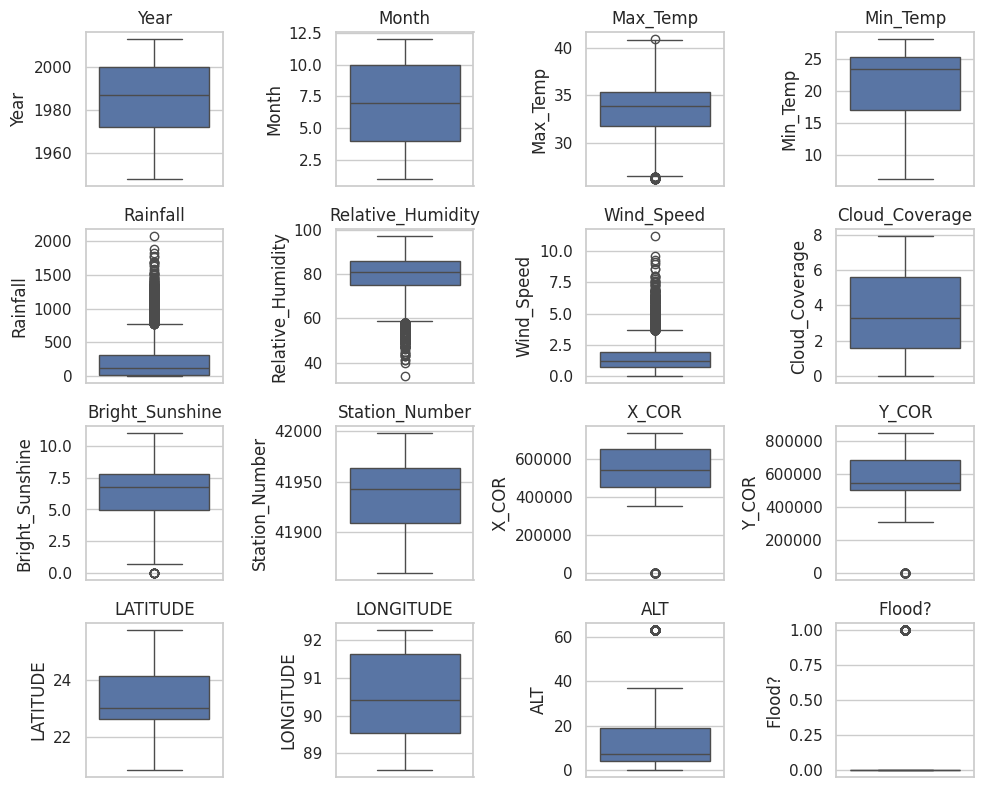

In [19]:
plt.figure(figsize=(10, 10))
num_cols = dmp1.select_dtypes(include = ["int64","float64"])
for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i+1)
    sns.boxplot(dmp1[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#### Removing outliers (Rain Fall)

In [20]:
q1Rainfall=dmp1.Rainfall.quantile(0.25)
q3Rainfall=dmp1.Rainfall.quantile(0.75)

# Step 2: Calculate the IQR (Interquartile Range)
iqrRainfall=q3Rainfall-q1Rainfall

# Step 3: Define the lower and upper bounds for 'Rainfall'
lower_boundRainfall = q1Rainfall - 1.5 * iqrRainfall
upper_boundRainfall = q3Rainfall + 1.5 * iqrRainfall

# Step 4: Filter out rows where 'Rainfall' is outside the bounds
Rainfall_outliers_removed = dmp1[(dmp1.Rainfall >= lower_boundRainfall) & (dmp1.Rainfall <= upper_boundRainfall)]

# Show the number of rows before and after removing outliers
print(f"Original dataset shape: {dm.shape}")
print(f"Dataset shape after removing outliers: {Rainfall_outliers_removed.shape}")

# Display the first few rows of the data without outliers

dmp2=Rainfall_outliers_removed
dmp2.head()

Original dataset shape: (20544, 16)
Dataset shape after removing outliers: (19618, 16)


,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Flood?
0,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,0.0
1,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.7,90.36,4,0.0
2,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.7,90.36,4,0.0
3,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.7,90.36,4,0.0
4,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.7,90.36,4,0.0


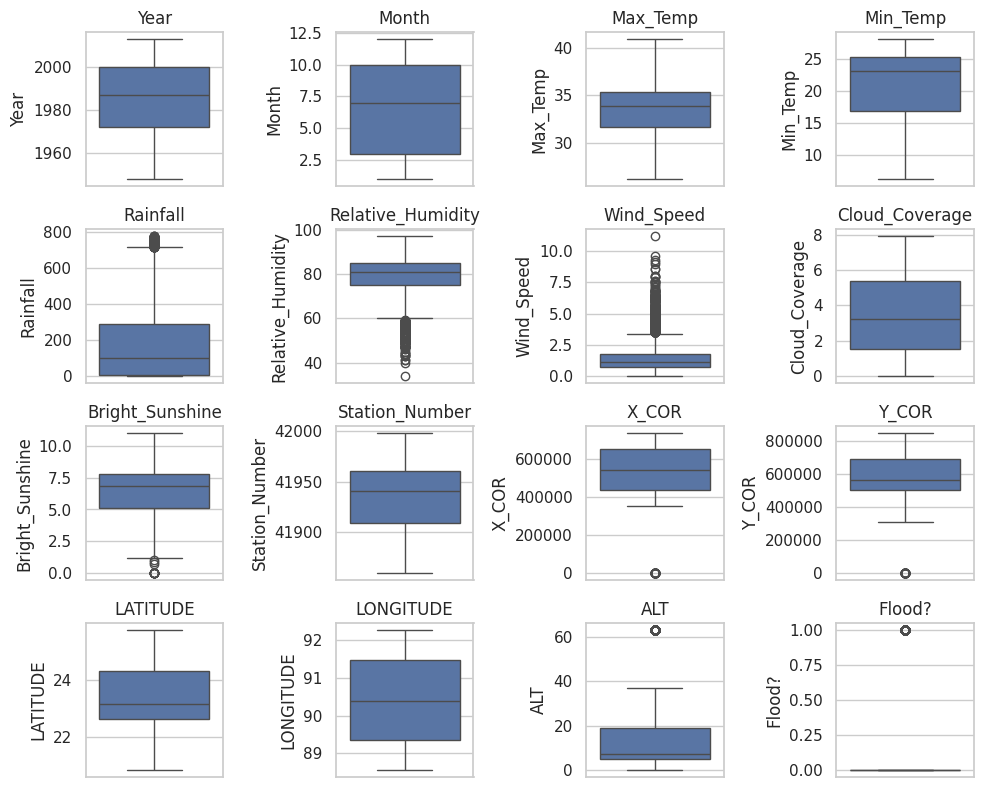

In [21]:
plt.figure(figsize=(10, 10))
num_cols = dmp2.select_dtypes(include = ["int64","float64"])
for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i+1)
    sns.boxplot(dmp2[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#### Removing outliers (Relative_Humidity)

In [22]:
q1Relative_Humidity=dmp2.Relative_Humidity.quantile(0.25)
q3Relative_Humidity=dmp2.Relative_Humidity.quantile(0.75)

# Step 2: Calculate the IQR (Interquartile Range)
iqrRelative_Humidity=q3Relative_Humidity-q1Relative_Humidity

# Step 3: Define the lower and upper bounds for 'Relative_Humidity'
lower_boundRelative_Humidity = q1Relative_Humidity - 1.5 * iqrRelative_Humidity
upper_boundRelative_Humidity = q3Relative_Humidity + 1.5 * iqrRelative_Humidity

# Step 4: Filter out rows where 'Relative_Humidity' is outside the bounds
Relative_Humidity_outliers_removed = dmp2[(dmp2.Relative_Humidity >= lower_boundRelative_Humidity) & (dmp2.Relative_Humidity <= upper_boundRelative_Humidity)]

# Show the number of rows before and after removing outliers
print(f"Original dataset shape: {dm.shape}")
print(f"Dataset shape after removing outliers: {Relative_Humidity_outliers_removed.shape}")

# Display the first few rows of the data without outliers

dmp3=Relative_Humidity_outliers_removed
dmp3.head()

Original dataset shape: (20544, 16)
Dataset shape after removing outliers: (19282, 16)


,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Flood?
0,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,0.0
1,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.7,90.36,4,0.0
3,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.7,90.36,4,0.0
4,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.7,90.36,4,0.0
5,1949,6,34.4,25.7,512.0,80.0,1.631481,5.6,4.072340,41950,536809.8,510151.9,22.7,90.36,4,1.0


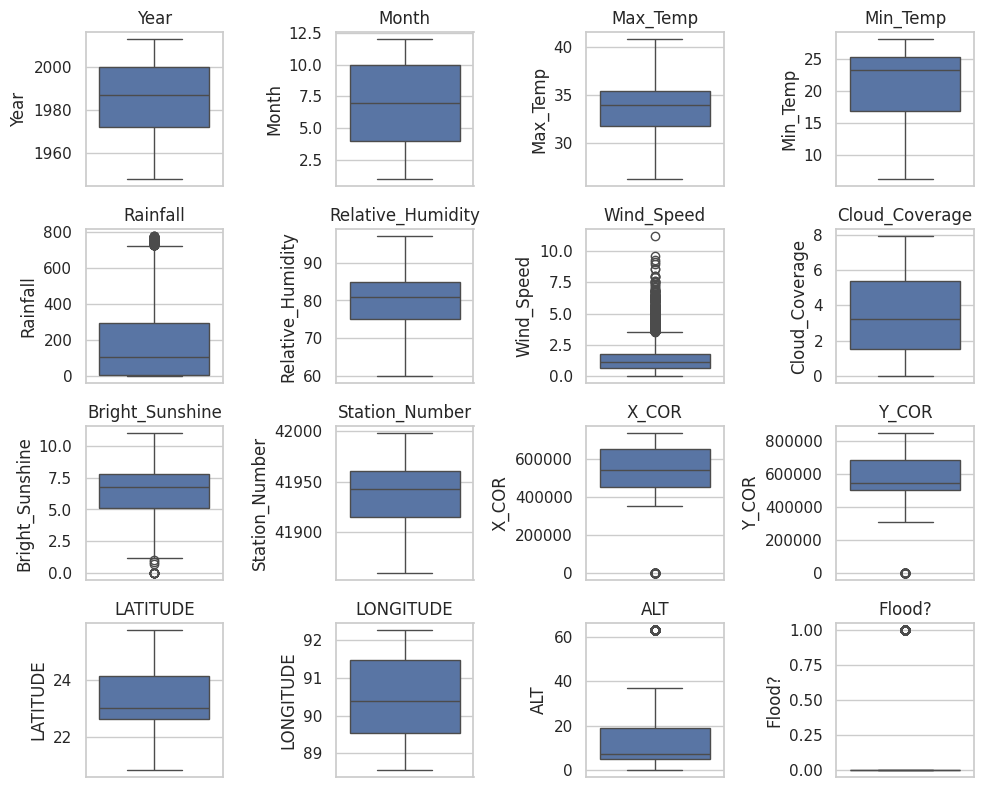

In [23]:
plt.figure(figsize=(10, 10))
num_cols = dmp3.select_dtypes(include = ["int64","float64"])
for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i+1)
    sns.boxplot(dmp3[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#### Removing outliers (Wind_Speed)

In [24]:
q1Wind_Speed=dmp3.Wind_Speed.quantile(0.25)
q3Wind_Speed=dmp3.Wind_Speed.quantile(0.75)

# Step 2: Calculate the IQR (Interquartile Range)
iqrWind_Speed=q3Wind_Speed-q1Wind_Speed

# Step 3: Define the lower and upper bounds for 'Wind_Speed'
lower_boundWind_Speed = q1Wind_Speed - 1.5 * iqrWind_Speed
upper_boundWind_Speed = q3Wind_Speed + 1.5 * iqrWind_Speed

# Step 4: Filter out rows where 'Wind_Speed' is outside the bounds
Wind_Speed_removed = dmp3[(dmp3.Wind_Speed >= lower_boundWind_Speed) & (dmp3.Wind_Speed <= upper_boundWind_Speed)]

# Show the number of rows before and after removing outliers
print(f"Original dataset shape: {dm.shape}")
print(f"Dataset shape after removing outliers: {Wind_Speed_removed.shape}")

# Display the first few rows of the data without outliers

dmp4=Wind_Speed_removed
dmp4.head()

Original dataset shape: (20544, 16)
Dataset shape after removing outliers: (18509, 16)


,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Flood?
0,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,0.0
1,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.7,90.36,4,0.0
3,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.7,90.36,4,0.0
4,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.7,90.36,4,0.0
5,1949,6,34.4,25.7,512.0,80.0,1.631481,5.6,4.072340,41950,536809.8,510151.9,22.7,90.36,4,1.0


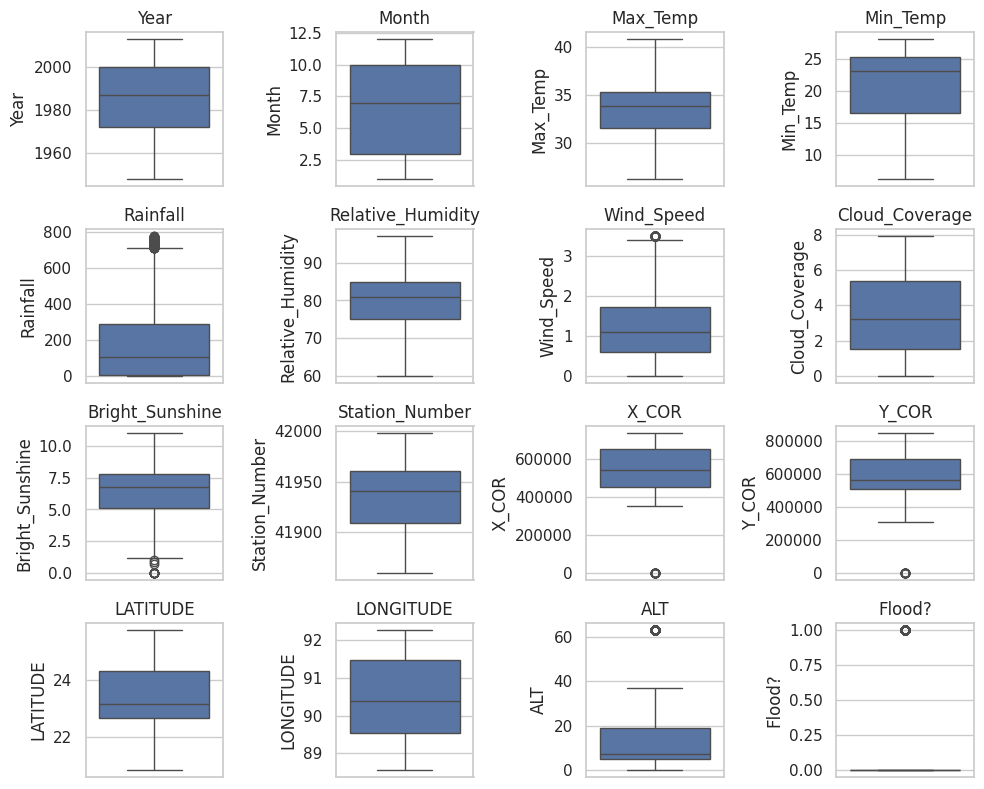

In [25]:
plt.figure(figsize=(10, 10))
num_cols = dmp4.select_dtypes(include = ["int64","float64"])
for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i+1)
    sns.boxplot(dmp4[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [26]:
dm1= dmp4.copy() #keeping a copy of pre processed data

In [27]:
from scipy.stats import skew, kurtosis
# Calculate skewness and kurtosis
num_cols=dm1.select_dtypes(include='number').columns
skewness = dm1[num_cols].apply(skew)
kurt = dm1[num_cols].apply(lambda x: kurtosis(x, fisher=False))
print(skewness)
print(kurt)
# Identify positive and negative skewness (absolute value > 1)
positive_skewness = skewness[skewness > 1]
negative_skewness = skewness[skewness < -1]
print('Variables with positive skewness (skew > 1):\n', positive_skewness)
print('Variables with negative skewness (skew < -1):\n', negative_skewness)
# Identify platykurtic (kurtosis < 3) and leptokurtic (kurtosis > 3) distributions
platykurtic = kurt[kurt < 3]
leptokurtic = kurt[kurt > 3]
print('Variables with platykurtic distribution (kurtosis < 3):\n', platykurtic)
print('Variables with leptokurtic distribution (kurtosis > 3):\n', leptokurtic)

Year                -0.310867
Month               -0.060177
Max_Temp            -0.381325
Min_Temp            -0.651720
Rainfall             1.067965
Relative_Humidity   -0.602449
Wind_Speed           0.713058
Cloud_Coverage       0.140917
Bright_Sunshine     -0.349437
Station_Number      -0.433311
X_COR               -0.177652
Y_COR                0.231289
LATITUDE             0.380814
LONGITUDE           -0.030078
ALT                  2.011465
Flood?               1.719605
dtype: float64
Year                 2.060189
Month                1.718437
Max_Temp             2.603761
Min_Temp             2.041023
Rainfall             3.270332
Relative_Humidity    2.713631
Wind_Speed           2.847881
Cloud_Coverage       1.662090
Bright_Sunshine      2.446198
Station_Number       2.468333
X_COR                2.537262
Y_COR                3.088549
LATITUDE             2.557854
LONGITUDE            1.786313
ALT                  6.940125
Flood?               3.957040
dtype: float64
Variables 

### VISUALIZATION

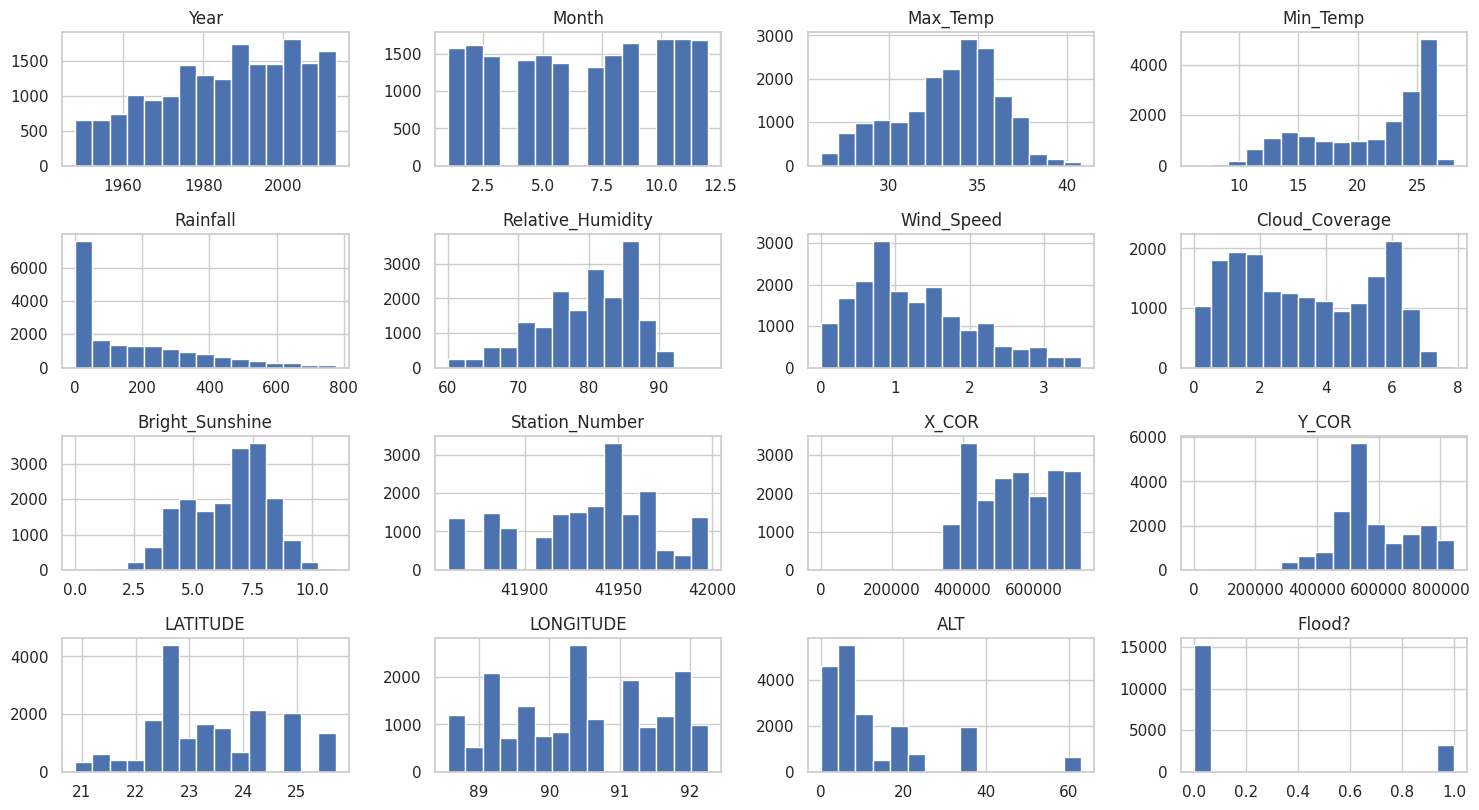

In [28]:
# Histograms for numerical columns after outlier treatment
num_cols = dm1.select_dtypes(include=['number']).columns

dm1[num_cols].hist(bins=15, figsize=(15, 10), layout=(5, 4))
plt.tight_layout()
plt.show()


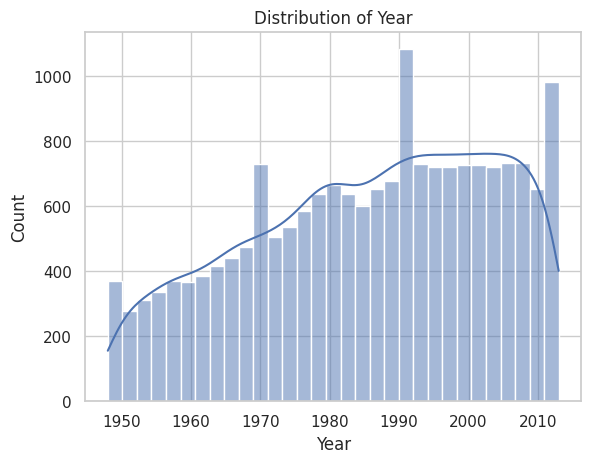

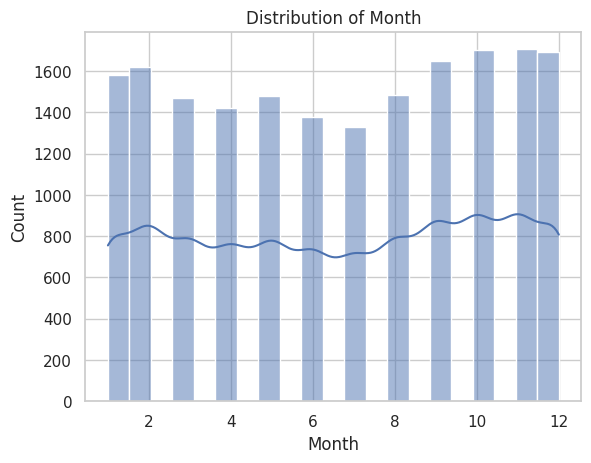

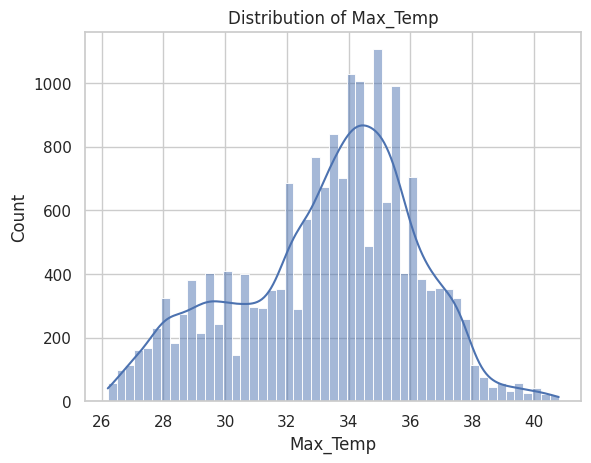

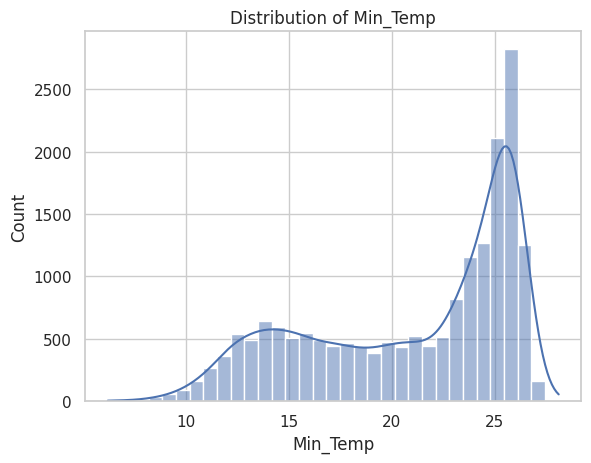

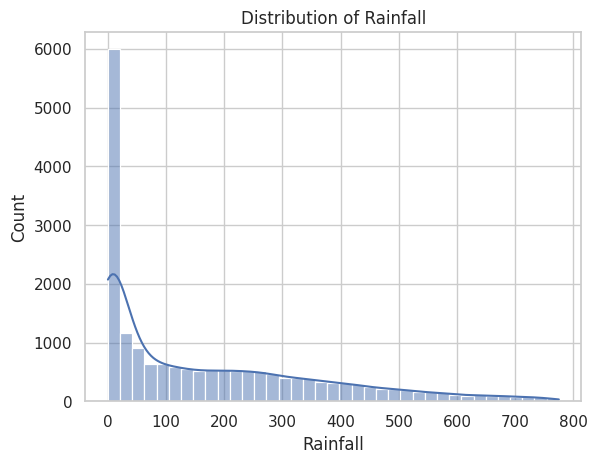

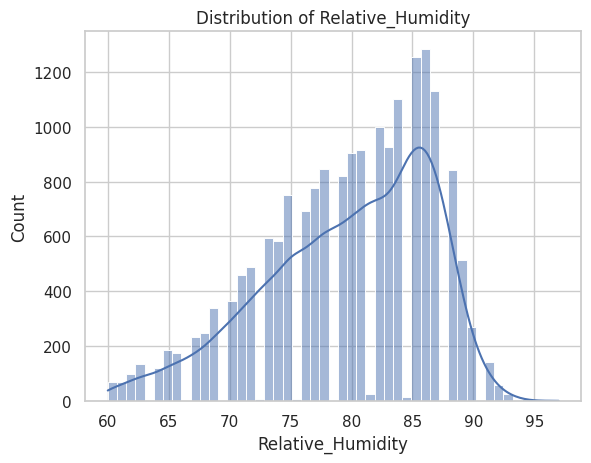

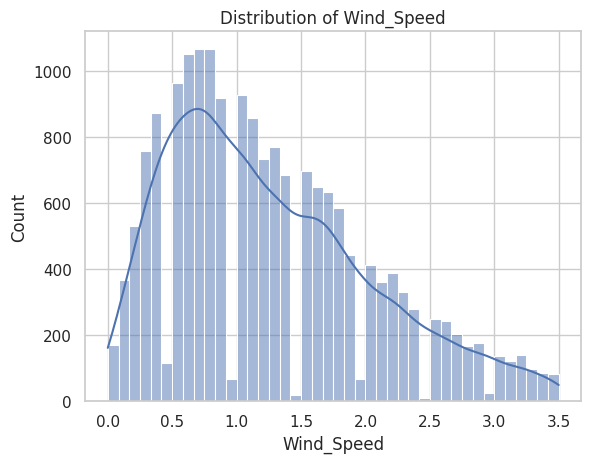

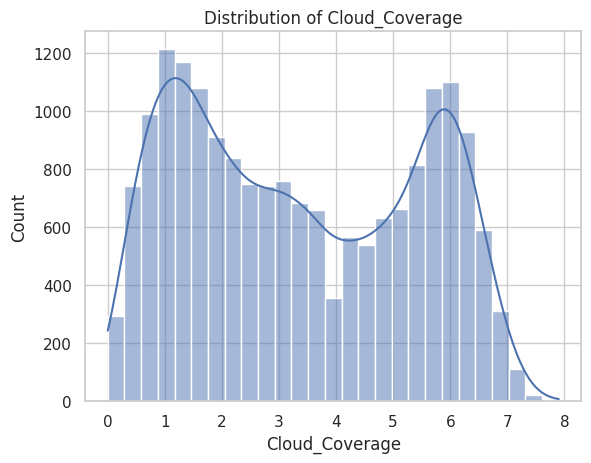

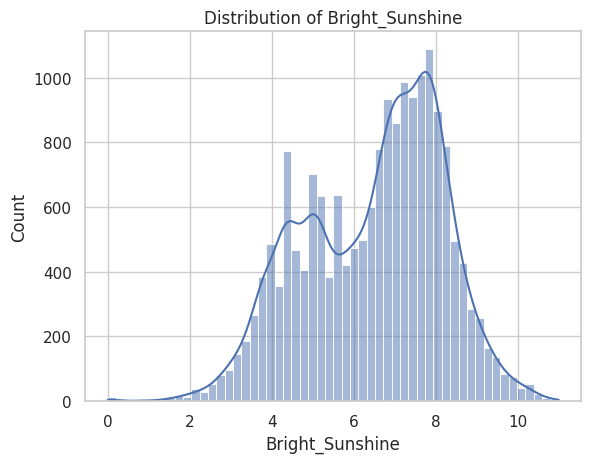

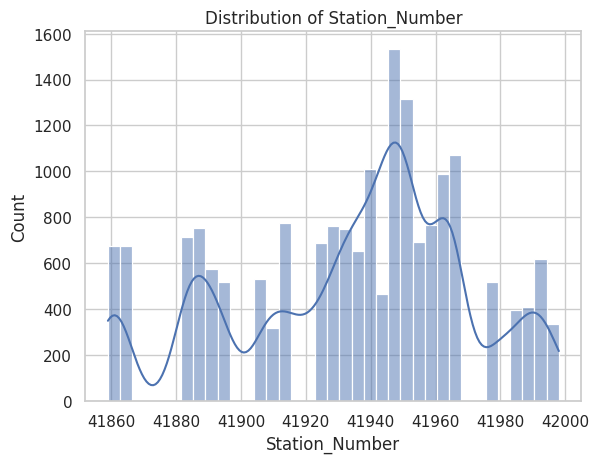

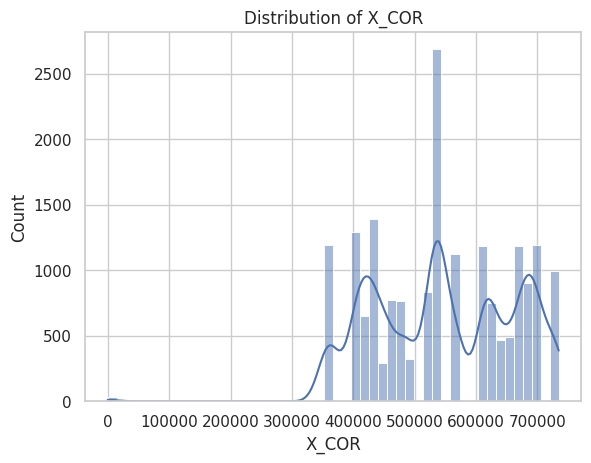

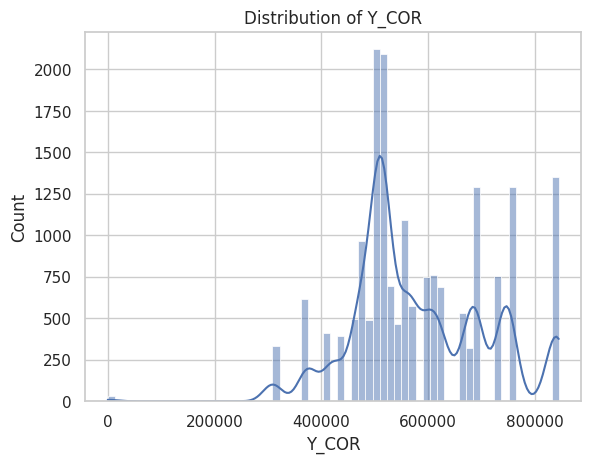

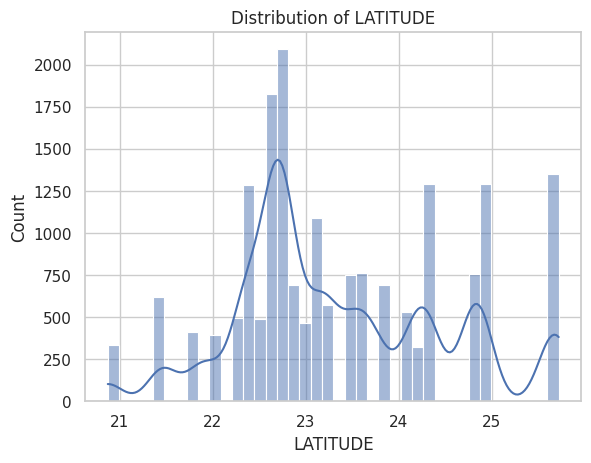

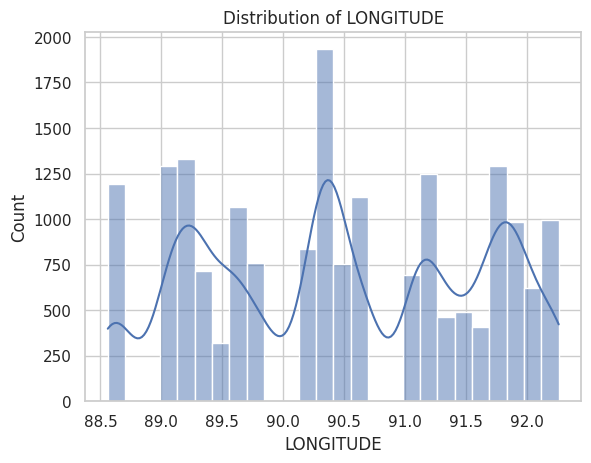

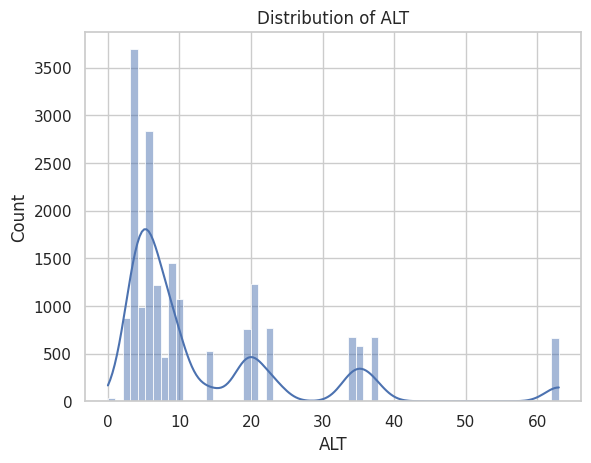

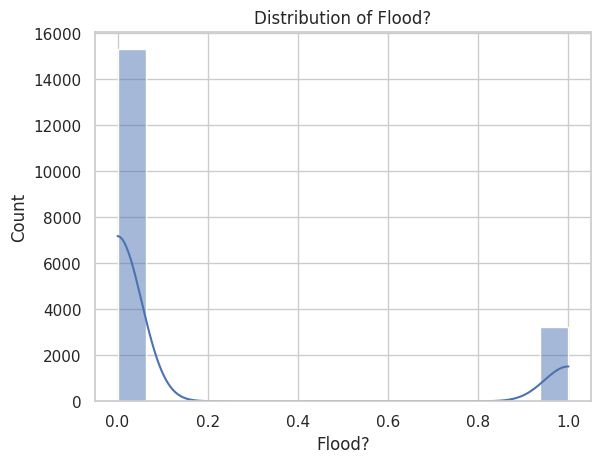

In [29]:
# Visualize the distributions to check for skewness
for column in dm1.columns:
    sns.histplot(dm1[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

### DATA SPLITTING

In [34]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = dm1.drop(columns=['Flood?'])  # Features
Y = dm1['Flood?']                 # Target (binary)

# Identify numerical columns in X
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Log transformation for numerical columns
X[numerical_columns] = np.log1p(X[numerical_columns])

# Scaling
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


### MODEL SELECTION

**Models Selected**
- Logistic Regressor Model
- Decision Tree Classifier Model
- Random Forest Classifier Model
- Gradient Boosting Classifier Model
- Support Vector Classifier

### MODEL TRAINING AND EVALUATION (Without Feature Selection & Hyperparameter Tuning)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# List to store model performance metrics
model_name = []
accuracy = []
precision = []
recall = []
f1 = []

# List of models to test
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC()
]

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)  # Fit the model to training data

    # Make predictions
    prediction = model.predict(X_test)

    # Append model name and metrics
    model_name.append(model.__class__.__name__)
    accuracy.append(accuracy_score(y_test, prediction))
    precision.append(precision_score(y_test, prediction))
    recall.append(recall_score(y_test, prediction))
    f1.append(f1_score(y_test, prediction))

# Create a DataFrame for model comparison
models_df = pd.DataFrame({
    "Model-Name": model_name,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
})

# Set model name as the index
models_df = models_df.set_index('Model-Name')

# Sort models by Accuracy (or any other metric)
models_df = models_df.sort_values("Accuracy", ascending=False)

# Display the results
print(models_df)


                            Accuracy  Precision    Recall  F1-Score
Model-Name                                                         
RandomForestClassifier      0.972447   0.940157  0.903177  0.921296
GradientBoostingClassifier  0.970016   0.933754  0.895613  0.914286
DecisionTreeClassifier      0.959211   0.893519  0.875946  0.884645
SVC                         0.954619   0.884555  0.857791  0.870968
LogisticRegression          0.943814   0.855573  0.824508  0.839753


### FEATURE SELECTION

### 1. SelectKBest

In [36]:
from sklearn.feature_selection import SelectKBest, f_regression
# SelectKBest with f_regression
selector_kbest = SelectKBest(score_func=f_regression, k=15)
X_kbest = selector_kbest.fit_transform(X_train, y_train)
# Get the selected feature indices
selected_indices_kbest = selector_kbest.get_support(indices=True)
# Get the names of the selected features
selected_features_kbest = X_train.columns[selected_indices_kbest]
print("Selected features using SelectKBest:", selected_features_kbest)

Selected features using SelectKBest: Index(['Year', 'Month', 'Max_Temp', 'Min_Temp', 'Rainfall',
       'Relative_Humidity', 'Wind_Speed', 'Cloud_Coverage', 'Bright_Sunshine',
       'Station_Number', 'X_COR', 'Y_COR', 'LATITUDE', 'LONGITUDE', 'ALT'],
      dtype='object')


### Training using features selected using SelectKBest

In [37]:
X1 = X[['Year', 'Month', 'Max_Temp', 'Min_Temp', 'Rainfall',
       'Relative_Humidity', 'Wind_Speed', 'Cloud_Coverage', 'Bright_Sunshine',
       'Station_Number', 'X_COR', 'Y_COR', 'LATITUDE', 'LONGITUDE', 'ALT']]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,Y,test_size = 0.2,random_state = 42)
model_name = []
accuracy = []
precision = []
recall = []
f1 = []
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC(),

]
for model in models :
    model.fit(X1_train , y1_train)

    prediction = model.predict(X1_test)

    model_name.append(model.__class__.__name__)

    accuracy.append(accuracy_score(y1_test, prediction))
    precision.append(precision_score(y1_test, prediction))
    recall.append(recall_score(y1_test, prediction))
    f1.append(f1_score(y1_test, prediction))

models_df = pd.DataFrame({"Model-Name":model_name, "accuracy": accuracy, "precision":precision, "recall":recall, "f1":f1})
models_df = models_df.set_index('Model-Name')
models_df.sort_values("f1", ascending = False)

,accuracy,precision,recall,f1
Model-Name,,,,
RandomForestClassifier,0.972447,0.941548,0.901664,0.921175
GradientBoostingClassifier,0.970016,0.933754,0.895613,0.914286
DecisionTreeClassifier,0.958401,0.888208,0.877458,0.882801
SVC,0.954619,0.884555,0.857791,0.870968
LogisticRegression,0.943814,0.855573,0.824508,0.839753


### 2. SelectFromModel with Lasso (L1 Regularization)

In [38]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
# Lasso model
lasso_model = Lasso(alpha=0.01)  # Adjust alpha as needed
# SelectFromModel with Lasso
selector_lasso = SelectFromModel(lasso_model, max_features=15)
X_lasso = selector_lasso.fit_transform(X_train, y_train)
# Get the selected feature indices
selected_indices_lasso = selector_lasso.get_support(indices=True)
# Print selected feature names
selected_features_lasso = X_train.columns[selected_indices_lasso]
print("Selected features using SelectFromModel with Lasso:", selected_features_lasso)

Selected features using SelectFromModel with Lasso: Index(['Max_Temp', 'Rainfall', 'Relative_Humidity', 'Wind_Speed',
       'Bright_Sunshine'],
      dtype='object')


### Training using features selected using Lasso

In [47]:
X2 = X[['Max_Temp', 'Rainfall', 'Relative_Humidity', 'Wind_Speed',
       'Bright_Sunshine']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,Y,test_size = 0.2,random_state = 42)
model_name = []
accuracy = []
precision = []
recall = []
f1 = []
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC(),

]
for model in models :
    model.fit(X2_train , y2_train)

    prediction = model.predict(X2_test)

    model_name.append(model.__class__.__name__)

    accuracy.append(accuracy_score(y2_test, prediction))
    precision.append(precision_score(y2_test, prediction))
    recall.append(recall_score(y2_test, prediction))
    f1.append(f1_score(y2_test, prediction))

models_df = pd.DataFrame({"Model-Name":model_name, "accuracy": accuracy, "precision":precision, "recall":recall, "f1":f1})
models_df = models_df.set_index('Model-Name')
models_df.sort_values("f1", ascending = False)

,accuracy,precision,recall,f1
Model-Name,,,,
RandomForestClassifier,0.941923,0.875421,0.786687,0.828685
GradientBoostingClassifier,0.941653,0.886957,0.771558,0.825243
SVC,0.938142,0.866102,0.773071,0.816946
LogisticRegression,0.935710,0.839486,0.791225,0.814642
DecisionTreeClassifier,0.903836,0.734255,0.723147,0.728659


# Hyperparameter tuning

is the process of adjusting settings in a machine learning model to make it work better.

To improve the model's performance: Better settings can lead to more accurate predictions.

To prevent mistakes: Good tuning helps the model not to memorize the training data (overfitting) or to be too simple (underfitting).

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import time
import pickle

# Define parameter grids
param_grids = {
    'LogisticRegression': {
        'fit_intercept': [True, False],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs'],
    },
    'DecisionTreeClassifier': {
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
    },
    'RandomForestClassifier': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
    },
    'GradientBoostingClassifier': {
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
    }
}

# Lists to store the results
model_name = []
accuracy = []
precision = []
recall = []
f1 = []
best_params = []

# Define the models
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()
]

# Loop through each model and perform GridSearchCV except for SVC, which uses RandomizedSearchCV
for model in models:
    model_class_name = model.__class__.__name__
    print(f"Starting tuning for {model_class_name}...")

    if model_class_name == 'SVC':
        search = RandomizedSearchCV(estimator=model,
                                    param_distributions=param_grids[model_class_name],
                                    scoring='accuracy',  # Classification scoring
                                    cv=3,
                                    n_iter=5,  # Number of random iterations
                                    n_jobs=-1,
                                    random_state=42)
    else:
        search = GridSearchCV(estimator=model,
                              param_grid=param_grids[model_class_name],
                              scoring='accuracy',  # Classification scoring
                              cv=5,
                              n_jobs=-1)

    # Fit the search model
    start_time = time.time()  # Start timing
    search.fit(X_train, y_train)
    end_time = time.time()  # End timing
    print(f"{model_class_name} tuning runtime: {(end_time - start_time) / 60:.2f} minutes")

    # Get the best model and make predictions
    best_model = search.best_estimator_
    prediction = best_model.predict(X_test)

    # Evaluate the model
    model_name.append(model_class_name)
    accuracy.append(accuracy_score(y_test, prediction))
    precision.append(precision_score(y_test, prediction, average='weighted'))
    recall.append(recall_score(y_test, prediction, average='weighted'))
    f1.append(f1_score(y_test, prediction, average='weighted'))
    best_params.append(search.best_params_)  # Store the best parameters
    print(f"{model_class_name} Best Params: {search.best_params_}")

    # Save the best model using pickle
    with open(f'{model_class_name}_best_model.pkl', 'wb') as file:
        pickle.dump(best_model, file)
    print(f"Saved {model_class_name} best model to {model_class_name}_best_model.pkl")

# Create a DataFrame with the results
models_df = pd.DataFrame({
    "Model-Name": model_name,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1": f1,
    "Best Params": best_params
})
models_df = models_df.set_index('Model-Name')
models_df = models_df.sort_values("F1", ascending=False)

# Display the results
print(models_df)


Starting tuning for LogisticRegression...
LogisticRegression tuning runtime: 0.06 minutes
LogisticRegression Best Params: {'C': 10, 'fit_intercept': True, 'solver': 'liblinear'}
Saved LogisticRegression best model to LogisticRegression_best_model.pkl
Starting tuning for DecisionTreeClassifier...
DecisionTreeClassifier tuning runtime: 0.08 minutes
DecisionTreeClassifier Best Params: {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
Saved DecisionTreeClassifier best model to DecisionTreeClassifier_best_model.pkl
Starting tuning for RandomForestClassifier...
RandomForestClassifier tuning runtime: 3.20 minutes
RandomForestClassifier Best Params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Saved RandomForestClassifier best model to RandomForestClassifier_best_model.pkl
Starting tuning for GradientBoostingClassifier...
GradientBoostingClassifier tuning runtime: 5.93 minutes
GradientBoostingClassifier Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_est

### CONCLUSION

RandoForestCalssifier has the best performance with lowest values of rmse, mse, mae and high value of r2 score

### SAVE THE MODEL

Saved the each model with the best parameters using pickle. Saved the model with ".pkl" extension

### LOAD THE MODEL

In [42]:
with open('RandomForestClassifier_best_model.pkl','rb') as file: # loading the RandomForestClassifier model
    mp=pickle.load(file)

### Test the Model

In [43]:
# Load the unseen data
unseen_data_path = "unseen_flood_data.csv"
unseen_df = pd.read_csv(unseen_data_path)

# Ensure unseen_df is defined before you use it
# List of feature names used during training
training_feature_names = ['Year', 'Month', 'Max_Temp', 'Min_Temp', 'Rainfall',
       'Relative_Humidity', 'Wind_Speed', 'Cloud_Coverage', 'Bright_Sunshine',
       'Station_Number', 'X_COR', 'Y_COR', 'LATITUDE', 'LONGITUDE', 'ALT']

# Make sure unseen data only contains the columns used during training
unseen_df = unseen_df[training_feature_names]  # Select relevant features

In [46]:
from sklearn.preprocessing import StandardScaler
import joblib
import pandas as pd

# Load the unseen data
unseen_data_path = "unseen_flood_data.csv"
unseen_df = pd.read_csv(unseen_data_path)

# Use the same feature names as used during training
unseen_df = unseen_df[training_feature_names]

# Preprocess the unseen data (apply the same transformations as the training data)
scaler = StandardScaler()

# Apply the same scaler used during training
unseen_data_scaled = scaler.fit_transform(unseen_df)  # Scale the unseen data

# Load the saved model
model_path = "RandomForestClassifier_best_model.pkl"
loaded_model = joblib.load(model_path)

# Predict using the loaded model
unseen_predictions = loaded_model.predict(unseen_data_scaled)
print("Predictions on unseen data:", unseen_predictions)

# Define the threshold: +ve is "Flood", -ve is "No Flood"
label_mapping = {0: "No Flood", 1: "Flood"}

# Apply the threshold and map predictions to labels
predicted_labels = [
    label_mapping[1 if pred > 0 else 0] for pred in unseen_predictions
]

print("Human-Readable Predictions on Unseen Data:", predicted_labels)


Predictions on unseen data: [0. 0. 0. 0. 0. 1. 1. 0.]
Human-Readable Predictions on Unseen Data: ['No Flood', 'No Flood', 'No Flood', 'No Flood', 'No Flood', 'Flood', 'Flood', 'No Flood']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [48]:
from sklearn.metrics import accuracy_score

# Example: True labels and predictions (continuous values)
y_true = [0, 0, 0, 0, 0, 1, 1, 0]

unseen_predictions = [0, 0, 0, 0, 0, 1, 1, 1]

# Calculate accuracy
accuracy = accuracy_score(y_true, unseen_predictions)

# Print accuracy
print("Accuracy on unseen data:", accuracy)


Accuracy on unseen data: 0.875


### Conclusion
This project successfully developed a machine learning model to predict flood based on the weather conditions. We performed data preprocessing, feature selection, and model training using multiple algorithms. By tuning the hyperparameters of the RandomForestClassifier, we achieved a highly accurate and generalized model. The saved model can now be used for real-time predictions.